In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

gobabis na
belushya guba ru
kodiak us
kavaratti in
dikson ru
sao filipe cv
vaini to
nikolskoye ru
mataura pf
emba kz
vaini to
ushuaia ar
yellowknife ca
hofn is
qinnan cn
taolanaro mg
belushya guba ru
bluff nz
georgetown sh
waipawa nz
punta arenas cl
ikorodu ng
belushya guba ru
esso ru
melito di porto salvo it
la rioja ar
hobart au
cape town za
mataura pf
tsihombe mg
puerto ayora ec
katsuura jp
jamestown sh
hilo us
cidreira br
krasavino ru
vaini to
yellowknife ca
arraial do cabo br
hobart au
mataura pf
vila velha br
albany au
thompson ca
bredasdorp za
butaritari ki
qingan cn
port alfred za
bredasdorp za
ponta do sol cv
vaini to
sao filipe cv
ribeira grande pt
mariakani ke
port alfred za
rikitea pf
namibe ao
castro cl
codrington ag
tuktoyaktuk ca
mar del plata ar
esperance au
cayenne gf
vaini to
kapaa us
butaritari ki
arraial do cabo br
yellowknife ca
rikitea pf
ribeira grande pt
sibolga id
brownsville us
vila velha br
chuy uy
dikson ru
ushuaia ar
camacha pt
nishihara jp
beboto td
taolan

pringsewu id
vaini to
vaini to
college us
bluff nz
port moresby pg
haines junction ca
fremont us
isangel vu
tiksi ru
saskylakh ru
guerrero negro mx
bloomfield us
ushuaia ar
olafsvik is
rikitea pf
mackay au
vaini to
broome au
barentsburg sj
upernavik gl
bluff nz
hithadhoo mv
constitucion cl
illoqqortoormiut gl
albany au
cape town za
port elizabeth za
tecolutilla mx
hithadhoo mv
umzimvubu za
buala sb
vaini to
pisco pe
georgetown sh
nemuro jp
hermanus za
tortoli it
shache cn
mbutuy py
mataura pf
ewa beach us
lorengau pg
nikitinskiy ru
torbay ca
busselton au
qaqortoq gl
bathsheba bb
saint george bm
tokmak kg
batagay ru
hirara jp
gondanglegi id
hobyo so
lebu cl
punta arenas cl
asyut eg
geraldton au
cabreuva br
ushuaia ar
sibu my
saint george bm
port elizabeth za
marzuq ly
bluff nz
mahebourg mu
port macquarie au
dikson ru
tuktoyaktuk ca
lata sb
kholuy ru
bilma ne
butaritari ki
merritt island us
albany au
the pas ca
victoria sc
san patricio mx
tasiilaq gl
nelson bay au
mahebourg mu
hilo us
ho

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [28]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [30]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | gobabis
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | emba
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | qinnan
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | waipawa
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | ikorodu
Processing Record 21 of Set 1 | esso
Processing Record 22 of Set 1 | melito di porto salvo
Processing Record 23 of Set 1 | la rioja
Proces

Processing Record 36 of Set 4 | guarapari
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | andenes
Processing Record 39 of Set 4 | korla
Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | innisfail
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | sosnovo-ozerskoye
Processing Record 1 of Set 5 | puerto penasco
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | harper
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | ila
Processing Record 6 of Set 5 | ponta delgada
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | humaita
Processing Record 9 of Set 5 | bangassou
Processing R

Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | jalu
Processing Record 29 of Set 8 | deqing
Processing Record 30 of Set 8 | west wendover
Processing Record 31 of Set 8 | namwala
Processing Record 32 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 33 of Set 8 | saint-georges
Processing Record 34 of Set 8 | nanortalik
Processing Record 35 of Set 8 | xingcheng
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 37 of Set 8 | ucluelet
Processing Record 38 of Set 8 | russell
Processing Record 39 of Set 8 | dera din panah
City not found. Skipping...
Processing Record 40 of Set 8 | mattru
Processing Record 41 of Set 8 | male
Processing Record 42 of Set 8 | meyungs
City not found. Skipping...
Processing Record 43 of Set 8 | oranzherei
Processing Record 44 of Set 8 | tanete
Processing Record 45 of Set 8 | finschhafen
Processing Record 46 of Set 8 | portobelo
Processing Record 47 of Set 8 | yarim
Processing Rec

Processing Record 18 of Set 12 | monrovia
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | la palma
Processing Record 21 of Set 12 | santa cruz
Processing Record 22 of Set 12 | gizo
Processing Record 23 of Set 12 | krosno odrzanskie
Processing Record 24 of Set 12 | lyuban
Processing Record 25 of Set 12 | malwan
City not found. Skipping...
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | sakassou
Processing Record 28 of Set 12 | coihaique
Processing Record 29 of Set 12 | vila do maio
Processing Record 30 of Set 12 | buraydah
Processing Record 31 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 32 of Set 12 | filingue
Processing Record 33 of Set 12 | goma
Processing Record 34 of Set 12 | linxia
Processing Record 35 of Set 12 | san vicente
Processing Record 36 of Set 12 | dharchula
Processing Record 37 of Set 12 | bubaque
Processing Record 38 of Set 12 | mjolby
Processing Record 39 of Set 12 | yashan
Processing Reco

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gobabis,-22.4500,18.9667,70.84,16,0,10.49,NA,2021-11-23 21:28:53
1,Kodiak,57.7900,-152.4072,11.71,62,90,8.05,US,2021-11-23 21:28:54
2,Kavaratti,10.5669,72.6420,81.36,79,73,12.84,IN,2021-11-23 21:24:57
3,Dikson,73.5069,80.5464,0.63,94,100,13.09,RU,2021-11-23 21:28:55
4,Sao Filipe,14.8961,-24.4956,79.65,71,99,3.67,CV,2021-11-23 21:28:55
5,Vaini,-21.2000,-175.2000,82.56,83,20,4.61,TO,2021-11-23 21:28:55
6,Nikolskoye,59.7035,30.7861,29.39,83,81,7.00,RU,2021-11-23 21:28:56
7,Mataura,-46.1927,168.8643,58.21,58,91,2.95,NZ,2021-11-23 21:28:57
8,Emba,48.8264,58.1442,36.45,99,100,3.60,KZ,2021-11-23 21:28:57
9,Ushuaia,-54.8000,-68.3000,46.02,70,90,8.05,AR,2021-11-23 21:27:34


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", 
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gobabis,NA,2021-11-23 21:28:53,-22.4500,18.9667,70.84,16,0,10.49
1,Kodiak,US,2021-11-23 21:28:54,57.7900,-152.4072,11.71,62,90,8.05
2,Kavaratti,IN,2021-11-23 21:24:57,10.5669,72.6420,81.36,79,73,12.84
3,Dikson,RU,2021-11-23 21:28:55,73.5069,80.5464,0.63,94,100,13.09
4,Sao Filipe,CV,2021-11-23 21:28:55,14.8961,-24.4956,79.65,71,99,3.67
5,Vaini,TO,2021-11-23 21:28:55,-21.2000,-175.2000,82.56,83,20,4.61
6,Nikolskoye,RU,2021-11-23 21:28:56,59.7035,30.7861,29.39,83,81,7.00
7,Mataura,NZ,2021-11-23 21:28:57,-46.1927,168.8643,58.21,58,91,2.95
8,Emba,KZ,2021-11-23 21:28:57,48.8264,58.1442,36.45,99,100,3.60
9,Ushuaia,AR,2021-11-23 21:27:34,-54.8000,-68.3000,46.02,70,90,8.05


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

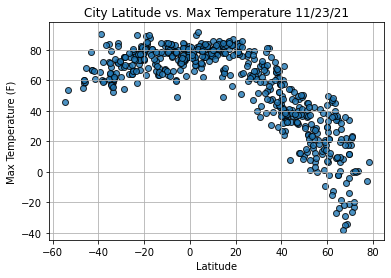

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

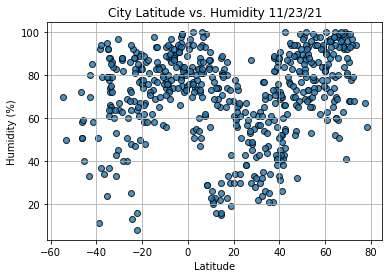

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

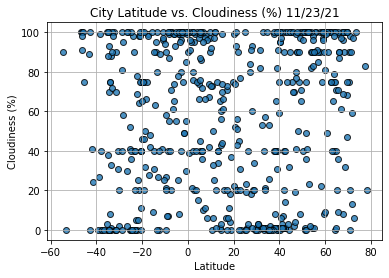

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

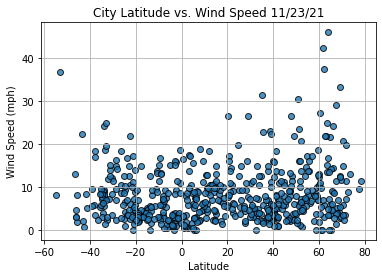

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    #no output until we call function w/ 5 parameters
    plt.show()

In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

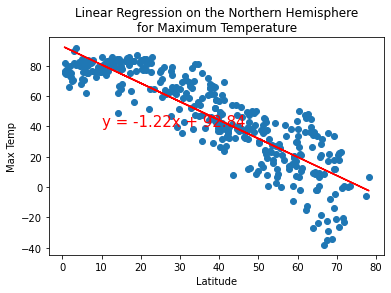

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(10,40))

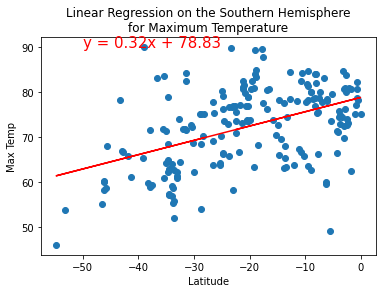

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(-50,90))

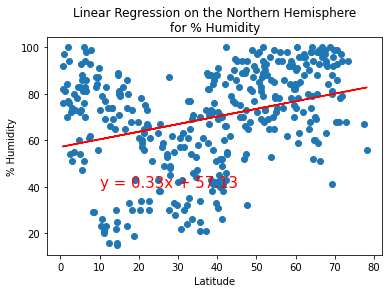

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',(10,40))

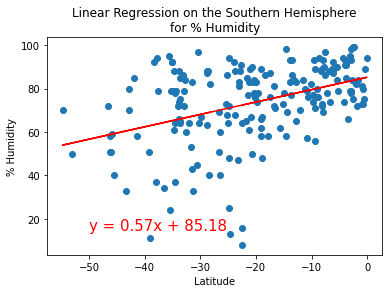

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',(-50,15))

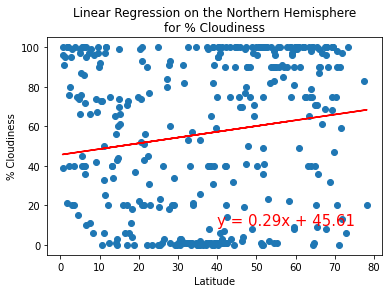

In [79]:
#Skill Drill: Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

#Refactor the code we have been using for linear regression lines and plots 
#to create the x- and y-values for the percent cloudiness and latitudes on 
#the Northern Hemisphere DataFrame.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the plot_linear_regression function with the correct arguments to 
#create the linear regression line and plot for percent cloudiness in the 
#Northern Hemisphere.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(40,10))

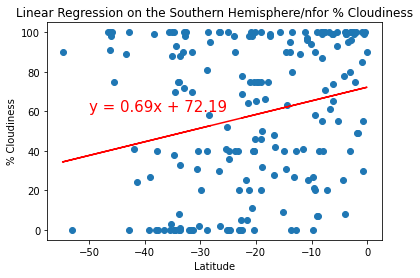

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere/nfor % Cloudiness',
                       '% Cloudiness',(-50,60))

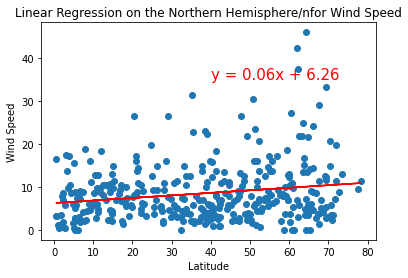

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere/nfor Wind Speed', 
                       'Wind Speed',(40,35))

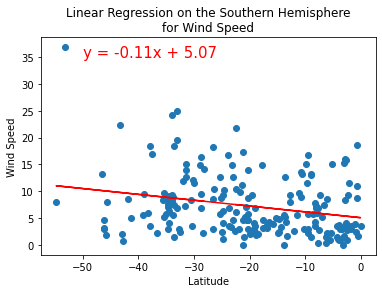

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(-50,35))